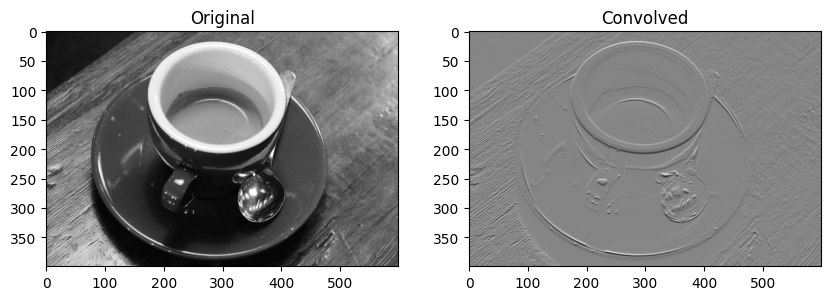

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data, color

image = color.rgb2gray(data.coffee())

filter = np.array([[1,2,1],
                   [0,0,0],
                   [-1,-2,-1]])

convolved = convolve2d(image, filter, mode='same', boundary='symm', fillvalue=0)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.title('Convolved')
plt.imshow(convolved, cmap='gray')
plt.show()

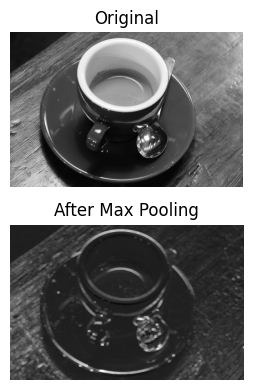

In [9]:
# Load grayscale image
image = color.rgb2gray(data.coffee())

# Define 2x2 max pooling function
def max_pooling(feature_map, size, stride):
    output_shape = (
        (feature_map.shape[0] - size) // stride + 1,
        (feature_map.shape[1] - size) // stride + 1
    )
    pooled = np.zeros(output_shape)
    for i in range(0, output_shape[0]):
        for j in range(0, output_shape[1]):
            region = feature_map[i*stride:i*stride+size, j*stride:j*stride+size]
            pooled[i, j] = np.max(region)
    return pooled

# Apply max pooling
pooled = max_pooling(convolved, size=5, stride=1)

# Show result
plt.figure(figsize=(15, 4))
plt.subplot(2,1,1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2,1,2)
plt.title("After Max Pooling")
plt.imshow(pooled, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()